# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataframe = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [ ]:
# Calculate the count of missing values in each column
missing_values = dataframe.isna().sum()

# Print the count of missing values
print(missing_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


Here there are maximum missing values in columns like make, model, trim, body, transmission and conditon.


## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [ ]:
dataframe.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

In [ ]:
dataframe['odometer'].fillna(dataframe['odometer'].mean(), inplace=True)
dataframe['odometer']=dataframe['odometer'].astype(int)
dataframe.dtypes

year             int64
make            object
model           object
trim            object
body            object
transmission    object
vin             object
state           object
condition       object
odometer         int64
color           object
interior        object
seller          object
mmr             object
sellingprice     int64
saledate        object
dtype: object

The data type for mmr is string which is a wrong one so I have changed the data type to int by first changing the string type to float and filling all the null values and then changed to int

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = dataframe.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [ ]:
# Get unique values in the 'make' column and convert them to a list
makes = dataframe['make'].unique().tolist()

# Convert the makes to lowercase strings
makes_lower = [str(make).lower() for make in makes]

# Sort the lowercase makes alphabetically
sorted_makes = sorted(makes_lower)

# Print the sorted list of makes
print(sorted_makes)

['acura', 'acura', 'airstream', 'aston martin', 'audi', 'audi', 'bentley', 'bmw', 'bmw', 'buick', 'buick', 'cadillac', 'cadillac', 'chev truck', 'chevrolet', 'chevrolet', 'chrysler', 'chrysler', 'daewoo', 'dodge', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford', 'ford tk', 'ford truck', 'geo', 'gmc', 'gmc', 'gmc truck', 'honda', 'honda', 'hummer', 'hyundai', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'jeep', 'kia', 'kia', 'lamborghini', 'land rover', 'land rover', 'landrover', 'lexus', 'lexus', 'lincoln', 'lincoln', 'lotus', 'maserati', 'maserati', 'mazda', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mercury', 'mini', 'mitsubishi', 'mitsubishi', 'nan', 'nissan', 'nissan', 'oldsmobile', 'oldsmobile', 'plymouth', 'plymouth', 'pontiac', 'pontiac', 'porsche', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'subaru', 'suzuki', 'suzuki', 'tesla', 'toyota', 'toyota', 'volkswagen', 'volk

In [ ]:
# Convert the 'make' column to the 'category' data type
dataframe['make'] = dataframe['make'].astype('category')

# Print the updated 'make' column
print(dataframe['make'])


0            Kia
1            Kia
2            BMW
3          Volvo
4            BMW
           ...  
558832       Kia
558833       Ram
558834       BMW
558835    Nissan
558836      Ford
Name: make, Length: 558837, dtype: category
Categories (96, object): ['Acura', 'Aston Martin', 'Audi', 'BMW', ..., 'suzuki', 'toyota',
                          'volkswagen', 'vw']


By executing the above code in the question I found that there are dupllicate values of car names and to clean the column I have changed the data type from string to category so that it will give us the list of car names available in the data

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [ ]:
# Calculate the correlation between 'mmr' and 'sellingprice'
correlation = dataframe['odometer'].corr(dataframe['sellingprice'])

# Print the correlation coefficient
print(correlation)


-0.5823137223740986


The complexity of the link between the two variables defines how raising the maximum selling price window will affect the correlation between the two. 

Increasing the maximum selling price window might have little effect on the correlation if there is a significant linear relationship between the two variables. On the other hand, if the association between the two variables is weak or non-linear, widening the maximum selling price range can make it fade entirely.

When the maximum selling price window widens, the correlation may become less vulnerable to transient changes or data noise and may offer a more solid indicator of the long-term link between the two variables. The correlation could lose sensitivity to recent changes or trends in the data, though, if the window is increased excessively.

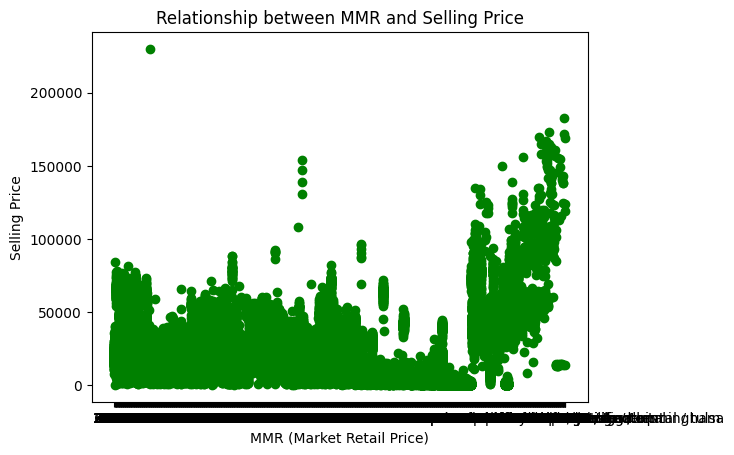

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'mmr' vs 'sellingprice'
plt.scatter(dataframe['mmr'], dataframe['sellingprice'], color='green')

# Set the x-axis label
plt.xlabel('MMR (Market Retail Price)')

# Set the y-axis label
plt.ylabel('Selling Price')

# Set the title of the plot
plt.title('Relationship between MMR and Selling Price')

# Display the plot
plt.show()


## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

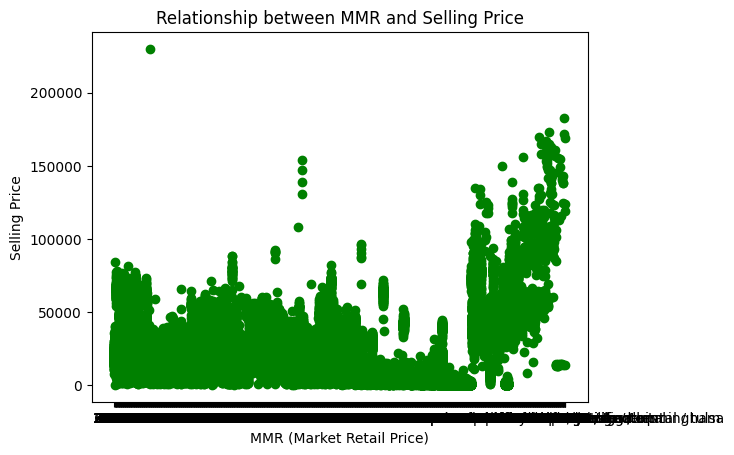

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of 'mmr' vs 'sellingprice'
plt.scatter(dataframe['mmr'], dataframe['sellingprice'], color='green')

# Set the x-axis label
plt.xlabel('MMR (Market Retail Price)')

# Set the y-axis label
plt.ylabel('Selling Price')

# Set the title of the plot
plt.title('Relationship between MMR and Selling Price')

# Display the plot
plt.show()


Sample narrative description.